# Cluster Spotify Data using K-Prototypes (Mix between K-means and K-modes)
The data has 19 features. 3 categorical features and 10 continuous features will be used for modeling while the other features that have IDs and track location data will need to be scrubbed. 

The data is easy to use and without misssing values

In [1]:
import pandas as pd
rawData = pd.read_csv('spotifyLibraryNames.csv')
list(rawData.columns)

['n',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature',
 'songName']

In [2]:
rawData.describe()

,n,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1.579000e+03,1579.000000
mean,789.000000,0.693868,0.636057,5.149462,-6.846179,0.550348,0.159726,0.173077,0.046422,0.190662,0.441259,124.746564,2.191493e+05,3.974668
std,455.962352,0.146006,0.159708,3.632930,2.434813,0.497616,0.131548,0.197039,0.158075,0.141716,0.223440,27.375703,5.726522e+04,0.262805
min,0.000000,0.157000,0.109000,0.000000,-21.447000,0.000000,0.024400,0.000025,0.000000,0.016000,0.026600,55.679000,5.564000e+04,1.000000
25%,394.500000,0.598000,0.530500,1.000000,-8.150500,0.000000,0.051700,0.024650,0.000000,0.101000,0.265000,103.723500,1.860735e+05,4.000000
50%,789.000000,0.708000,0.637000,5.000000,-6.568000,1.000000,0.108000,0.093300,0.000004,0.134000,0.420000,125.993000,2.134000e+05,4.000000
75%,1183.500000,0.805000,0.750000,8.000000,-5.200000,1.000000,0.251000,0.259000,0.001485,0.238000,0.601000,142.336000,2.461730e+05,4.000000
max,1578.000000,0.980000,0.994000,11.000000,-0.283000,1.000000,0.855000,0.944000,0.973000,0.966000,0.980000,215.593000,1.146163e+06,5.000000


# Data Cleaning

In [3]:
#remove unnecessary data like id and song name (not needed in modeling)
rawDataVals = [x for x in rawData.columns if x not in ['n','type', 'id',
                                                              'uri', 'track_href', 'analysis_url', 'songName']]
rawDataDF = rawData[rawDataVals]#.set_index(rawData.id)

In [4]:
#rawDataScrubedVals

In [5]:
#rawDataDF

## Fixed skewed data and use minmax transformations for continous data. 

In [6]:
#if skew is above abs(.75)
skew_columns = abs(rawDataDF.skew()).sort_values(ascending=False)
skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

time_signature      4.463814
instrumentalness    3.978852
duration_ms         3.530164
liveness            1.991646
acousticness        1.464260
speechiness         1.154096
loudness            0.930715
dtype: float64

## fixed skewed columns

Used a combination of boxcox and log transformations to find the the best distributions

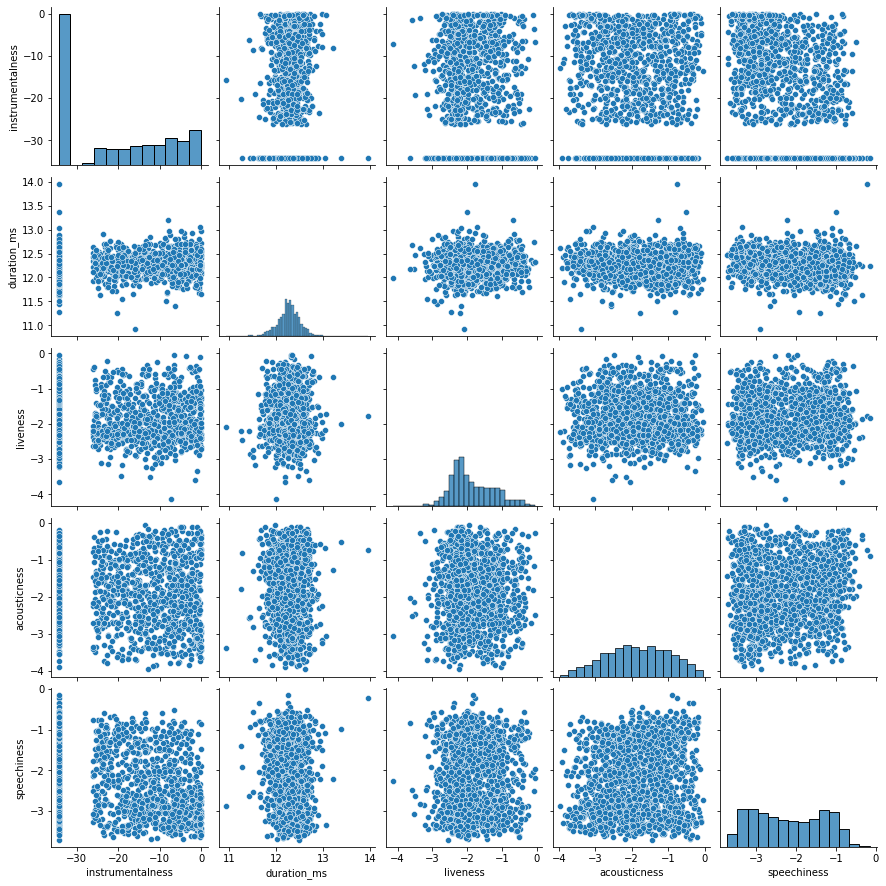

In [7]:
import numpy as np
from scipy import stats

#t_data_df will be the transformed data for addressing skewness
t_data_df = rawDataDF.copy()
#(numeric_data_df.instrumentalness).unique().size
#np.sqrt(numeric_data_df.instrumentalness).hist()
t_data_df['instrumentalness'] = t_data_df['instrumentalness'].replace(0,0.0000001)
t_data_df['instrumentalness'] = stats.boxcox(t_data_df['instrumentalness'])[0]
t_data_df['duration_ms'] = np.log(t_data_df['duration_ms'])
t_data_df['liveness'] = np.log(t_data_df['liveness'])
t_data_df['acousticness'] = stats.boxcox(t_data_df['acousticness'])[0]
t_data_df['speechiness'] = np.log(t_data_df['speechiness'])

import seaborn as sns

skew_data = ['instrumentalness','duration_ms','liveness','acousticness','speechiness']
sns.pairplot(t_data_df[skew_data])

## scale features
use MinMaxScaler to scale continous features

In [8]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
t_data_df[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']] = sc.fit_transform(t_data_df[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']])
# scaledFeatures_df = pd.DataFrame(scaledFeatures, index=t_data_df.index, columns=t_data_df.columns)
# scaledFeatures_df
t_data_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.594168,0.605650,4,0.672510,0,0.091628,0.947870,0.931296,0.523681,0.468219,0.533462,0.495397,4
1,0.917375,0.616949,8,0.728501,0,0.532266,0.755123,0.522799,0.419583,0.803860,0.226766,0.300955,4
2,0.648846,0.813559,0,0.674164,1,0.147294,0.394649,0.000000,0.674234,0.880428,0.233751,0.367539,4
3,0.653706,0.875706,6,0.905736,0,0.316854,0.475785,0.000000,0.631303,0.930774,0.296003,0.429143,4
4,0.718104,0.712994,8,0.729399,1,0.192581,0.294073,0.491543,0.449335,0.515419,0.408501,0.454708,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,0.591738,0.418079,4,0.618739,1,0.557165,0.641336,0.000000,0.899219,0.614013,0.151644,0.389329,4
1575,0.383961,0.397740,6,0.707475,0,0.734865,0.620236,0.000000,0.440233,0.617160,0.689783,0.475107,4
1576,0.752126,0.343503,6,0.661926,0,0.382789,0.217393,0.506306,0.368148,0.273128,0.277174,0.466046,4
1577,0.400972,0.700565,2,0.691363,1,0.676936,0.470290,0.361518,0.808225,0.199706,0.221175,0.608003,4


# K-Prototypes

"The first clustering method we will try is called K-Prototypes. This algorithm is essentially a cross between the K-means algorithm and the K-modes algorithm."

https://medium.com/analytics-vidhya/clustering-on-mixed-data-types-in-python-7c22b3898086

In [9]:
from kmodes.kprototypes import KPrototypes

kproto = KPrototypes(n_clusters=20, init='Cao')
clusters = kproto.fit_predict(t_data_df, categorical=[2,4,12])

In [10]:
labels = pd.DataFrame(clusters)
labeledSongs = pd.concat((rawDataDF,labels),axis=1)
labeledSongs = labeledSongs.rename({0:'labels'},axis=1)

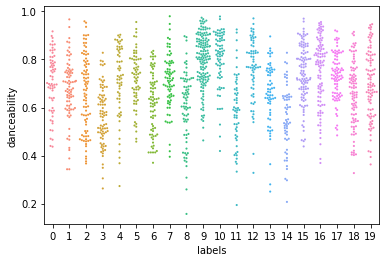

In [27]:
import matplotlib.pyplot as plt
sns.swarmplot(x='labels',y='danceability',data=labeledSongs, s=2.1)
plt.xlabel('labels')
plt.ylabel('danceability')
plt.show()

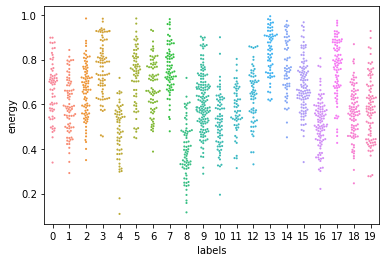

In [28]:
import matplotlib.pyplot as plt
sns.swarmplot(x='labels',y='energy',data=labeledSongs,s=2.1)
plt.xlabel('labels')
plt.ylabel('energy')
plt.show()

C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: 

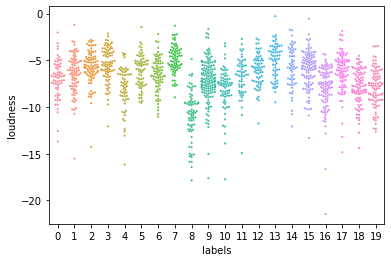

In [29]:
import matplotlib.pyplot as plt
sns.swarmplot(x='labels',y='loudness',data=labeledSongs,s=2.1)
plt.xlabel('labels')
plt.ylabel('loudness')
plt.show()

C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:129

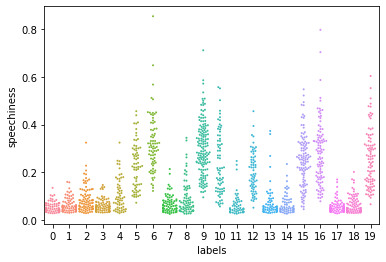

In [31]:
import matplotlib.pyplot as plt
sns.swarmplot(x='labels',y='speechiness',data=labeledSongs,s=2)
plt.xlabel('labels')
plt.ylabel('speechiness')
plt.show()

C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296

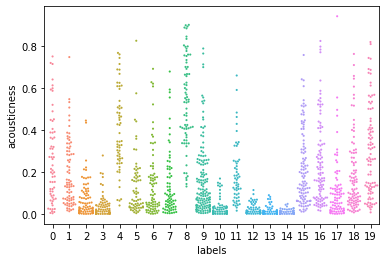

In [32]:
import matplotlib.pyplot as plt
sns.swarmplot(x='labels',y='acousticness',data=labeledSongs,s=2.1)
plt.xlabel('labels')
plt.ylabel('acousticness')
plt.show()

C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 91.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 91.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:129

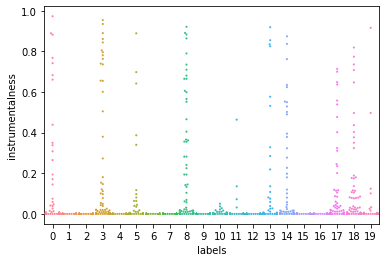

In [33]:
import matplotlib.pyplot as plt
sns.swarmplot(x='labels',y='instrumentalness',data=labeledSongs,s=2.1)
plt.xlabel('labels')
plt.ylabel('instrumentalness')
plt.show()

C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: 

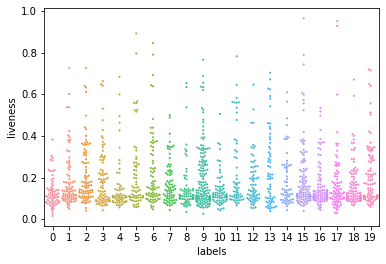

In [34]:
import matplotlib.pyplot as plt
sns.swarmplot(x='labels',y='liveness',data=labeledSongs,s=2.1)
plt.xlabel('labels')
plt.ylabel('liveness')
plt.show()

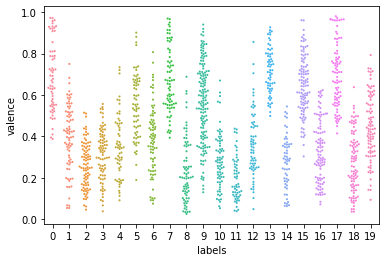

In [35]:
import matplotlib.pyplot as plt
sns.swarmplot(x='labels',y='valence',data=labeledSongs,s=2.1)
plt.xlabel('labels')
plt.ylabel('valence')
plt.show()

C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


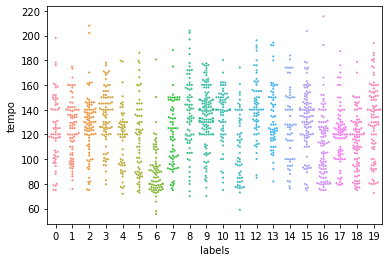

In [36]:
import matplotlib.pyplot as plt
sns.swarmplot(x='labels',y='tempo',data=labeledSongs,s=2.1)
plt.xlabel('labels')
plt.ylabel('tempo')
plt.show()

C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jbaskerville\Anaconda3\lib\site-packages\seaborn\categorical.py:129

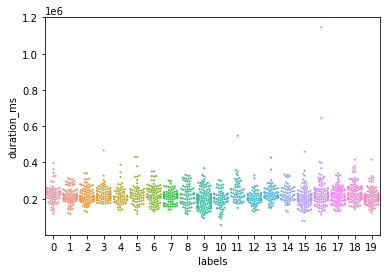

In [37]:
import matplotlib.pyplot as plt
sns.swarmplot(x='labels',y='duration_ms',data=labeledSongs,s=2.1)
plt.xlabel('labels')
plt.ylabel('duration_ms')
plt.show()